In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\program files\python312\lib\site-packages (2.2.2)




[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import sklearn
print(sklearn.__version__)

1.5.1


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys,os
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from itertools import product
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
dataset=pd.read_csv("voice.csv")

In [7]:
dataset

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [9]:
dataset.isna().sum()##checking null values

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [10]:
data=dataset.dropna()
print(data)

      meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm  ...  centroi

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3444\2879709806.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gender = [count[0], count[1]]


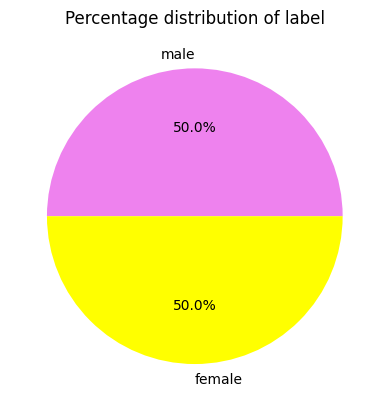

In [11]:
count = dataset.pivot_table(columns=['label'], aggfunc='size')
gender = [count[0], count[1]]
pie_labels = ["male", "female"]
colors = ['VIOLET', 'YELLOW']
plt.pie(gender, labels=pie_labels, autopct="%1.1f%%", colors=colors)
plt.title("Percentage distribution of label")
plt.show()

In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
print(y_train)

['female' 'male' 'male' ... 'female' 'female' 'female']


In [15]:
print(X_test)

[[0.19528383 0.03766286 0.19572816 ... 7.4296875  7.2890625  0.09409376]
 [0.17948993 0.06042679 0.1815235  ... 4.546875   4.5234375  0.11371693]
 [0.22159779 0.02752513 0.22067797 ... 4.125      3.9140625  0.10689732]
 ...
 [0.15757874 0.07969795 0.14780059 ... 4.9609375  4.953125   0.10949001]
 [0.20704995 0.03953664 0.20566372 ... 8.71875    8.6953125  0.08035259]
 [0.16115553 0.05365452 0.16872908 ... 0.22949219 0.06347656 0.16239316]]


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
print(X_train)

[[ 1.1733184  -1.07639646  0.60643706 ...  1.36899403  1.37733185
  -1.10487294]
 [-1.0261755   0.31960418 -1.5865356  ... -0.32387353 -0.3365899
   1.5271315 ]
 [ 0.24410496  0.3359349  -0.73302622 ...  0.50891476  0.51720062
  -0.17856546]
 ...
 [-1.57449808  1.50214356 -1.23234205 ... -0.34234319 -0.33410875
  -0.16827451]
 [ 1.90059249 -1.65427054  1.57488282 ...  1.30945008  1.3177843
  -0.43129411]
 [ 0.19083445 -1.39783694  0.14542653 ...  1.18374618  1.19207281
  -0.32668108]]


In [20]:
print(X_test)

[[ 0.48416213 -1.16901478  0.27633325 ...  0.66108263  0.63629571
  -0.68150995]
 [-0.05327662  0.20180805 -0.12292272 ... -0.15268468 -0.14443879
  -0.51274936]
 [ 1.37958024 -1.77949917  0.97760766 ... -0.27177258 -0.31646504
  -0.57139851]
 ...
 [-0.79887615  1.36229896 -1.07078629 ... -0.03580211 -0.02313823
  -0.54910118]
 [ 0.88454249 -1.05617728  0.55559609 ...  1.02496232  1.03327936
  -0.79968485]
 [-0.67716403 -0.20601197 -0.48254078 ... -1.37140598 -1.40348345
  -0.09413071]]


In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [22]:
print(classifier.predict(sc.transform(X_train)))

['female' 'male' 'male' ... 'female' 'female' 'female']


In [23]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['female' 'female']
 ['male' 'male']
 ['female' 'female']
 ...
 ['male' 'male']
 ['female' 'female']
 ['female' 'female']]


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
L0GISTIC_CLASSIFIER_ACCURACY=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[289  12]
 [  5 328]]
              precision    recall  f1-score   support

      female       0.98      0.96      0.97       301
        male       0.96      0.98      0.97       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
print(classifier.predict(sc.transform(X_train)))

['female' 'male' 'male' ... 'male' 'female' 'female']


In [27]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['female' 'female']
 ['male' 'male']
 ['female' 'female']
 ...
 ['male' 'male']
 ['female' 'female']
 ['female' 'female']]


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
DECICION_TREE_CLASSIFIER_ACCURACY=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[290  11]
 [ 13 320]]
              precision    recall  f1-score   support

      female       0.96      0.96      0.96       301
        male       0.97      0.96      0.96       333

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [30]:
print(classifier.predict(sc.transform(X_train)))

['female' 'male' 'male' ... 'female' 'female' 'female']


In [31]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['female' 'female']
 ['male' 'male']
 ['female' 'female']
 ...
 ['male' 'male']
 ['female' 'female']
 ['female' 'female']]


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
SVM_CLASSIFIER_ACCURACY=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[289  12]
 [  5 328]]
              precision    recall  f1-score   support

      female       0.98      0.96      0.97       301
        male       0.96      0.98      0.97       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [34]:
print(classifier.predict(sc.transform(X_train)))

['female' 'male' 'male' ... 'female' 'female' 'female']


In [35]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['female' 'female']
 ['male' 'male']
 ['female' 'female']
 ...
 ['male' 'male']
 ['female' 'female']
 ['female' 'female']]


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
RANDOM_FOREST_CLASSIFIER_ACCURACY=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[296   5]
 [  9 324]]
              precision    recall  f1-score   support

      female       0.97      0.98      0.98       301
        male       0.98      0.97      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
print(classifier.predict(sc.transform(X_train)))

['female' 'male' 'female' ... 'male' 'female' 'female']


In [39]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['female' 'female']
 ['male' 'male']
 ['female' 'female']
 ...
 ['male' 'male']
 ['female' 'female']
 ['female' 'female']]


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
KNN_CLASSIFIER_ACCURACY = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[293   8]
 [  6 327]]
              precision    recall  f1-score   support

      female       0.98      0.97      0.98       301
        male       0.98      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [41]:
print("LOGISTIC REGRESSION CLASSIFIER = ",L0GISTIC_CLASSIFIER_ACCURACY)
print("DECISION TREE CLASSIFIER = ",DECICION_TREE_CLASSIFIER_ACCURACY)
print("SVM CLASSIFIER = ",SVM_CLASSIFIER_ACCURACY)
print("RANDOM FOREST CLASSIFIER = ",RANDOM_FOREST_CLASSIFIER_ACCURACY)
print("KNN CLASSIFIER = ",KNN_CLASSIFIER_ACCURACY)

LOGISTIC REGRESSION CLASSIFIER =  0.973186119873817
DECISION TREE CLASSIFIER =  0.9621451104100947
SVM CLASSIFIER =  0.973186119873817
RANDOM FOREST CLASSIFIER =  0.9779179810725552
KNN CLASSIFIER =  0.9779179810725552
